# iDM Tutorial: Literature 

In this tutorial, we will look at using computational tools for collecting a mass amount of literature, and using tools for automatically summarising and highlighting text for keywords. This is to assist in identifying important components of the literature you are interested in.

This tutorial will run as follows:

1.   Gathering: We will look at how to collect papers on mass using various resources.
2.   Highlighting: We will highlight a mass number of paper using Python.
3.   Focusing: We will extract the text from papers and show only the segments in the paper with the keywords. 



--------------

# Preamble: Download this Google Colab Notebook to your Google Drive

It is possible to save a copy of this Google Colab notebook to your Google Drive. This is useful if you would like to write notes to this notebook, or to make changes or additions to the code in this notebook. 

**If you would like to save a copy of this notebook to your Google Drive before beginning**, do the following: 

1. Click the copy_to_drive.png button at the top of the Google Colab webpage.
2. A message may appear that says Google Colab wants to open the copied Google Colab notebook in a new tab. Click the button that says open the copied notebook in a new tab if this comes up. 
3. **Quit the original tab with the original Google Colab notebook** so that we dont get mixed up with notebooks. 

**NOTE**: You can find this notebook in your Google Drive now in a new folder called ```Colab Notebooks```. 

**If you do not want to save a copy of this notebook to your Google Drive**, take note that you will get the following message when your begin to run code in this notebook (see below). When this comes up, click the ```Run anyway``` button to allow the code to run.

<img src=https://raw.githubusercontent.com/geoffreyweal/Literature_Mining_Tutorial/main/Notebooks/images/max_50.png width="500">

We are now ready to run this Google Colab Notebook. 

------------------

#1. Gathering Papers on Mass

There are several methods for obtaining scientific literature on mass, some of them legal, some probably not legal but useful for automating the gathering of data from the literature easily. 

For this tutorial, we will be looking at two (legal) ways for obtaining a large amount of scientific papers together to be used for further analysis.

# 1.1: Gathering Scientific Papers from arXiv using Python

arXiv (https://arxiv.org) is a free distribution service and an open-access archive, hosted by Cornell University. This archive contains many scientific papers, spanning a variety of research fields. 

To begin this tutorial, we will use Python to download a large number of papers from the arXiv website automatically. 

**First**, we will open the ```Files``` panel so that we can see what is happening as we download papers from the arXiv website. To do this, **press the** Files **folder icon to the left of this Google Colab page**.

<-- **It will be where this arrow is pointing, somewhere to the left of this webpage**.

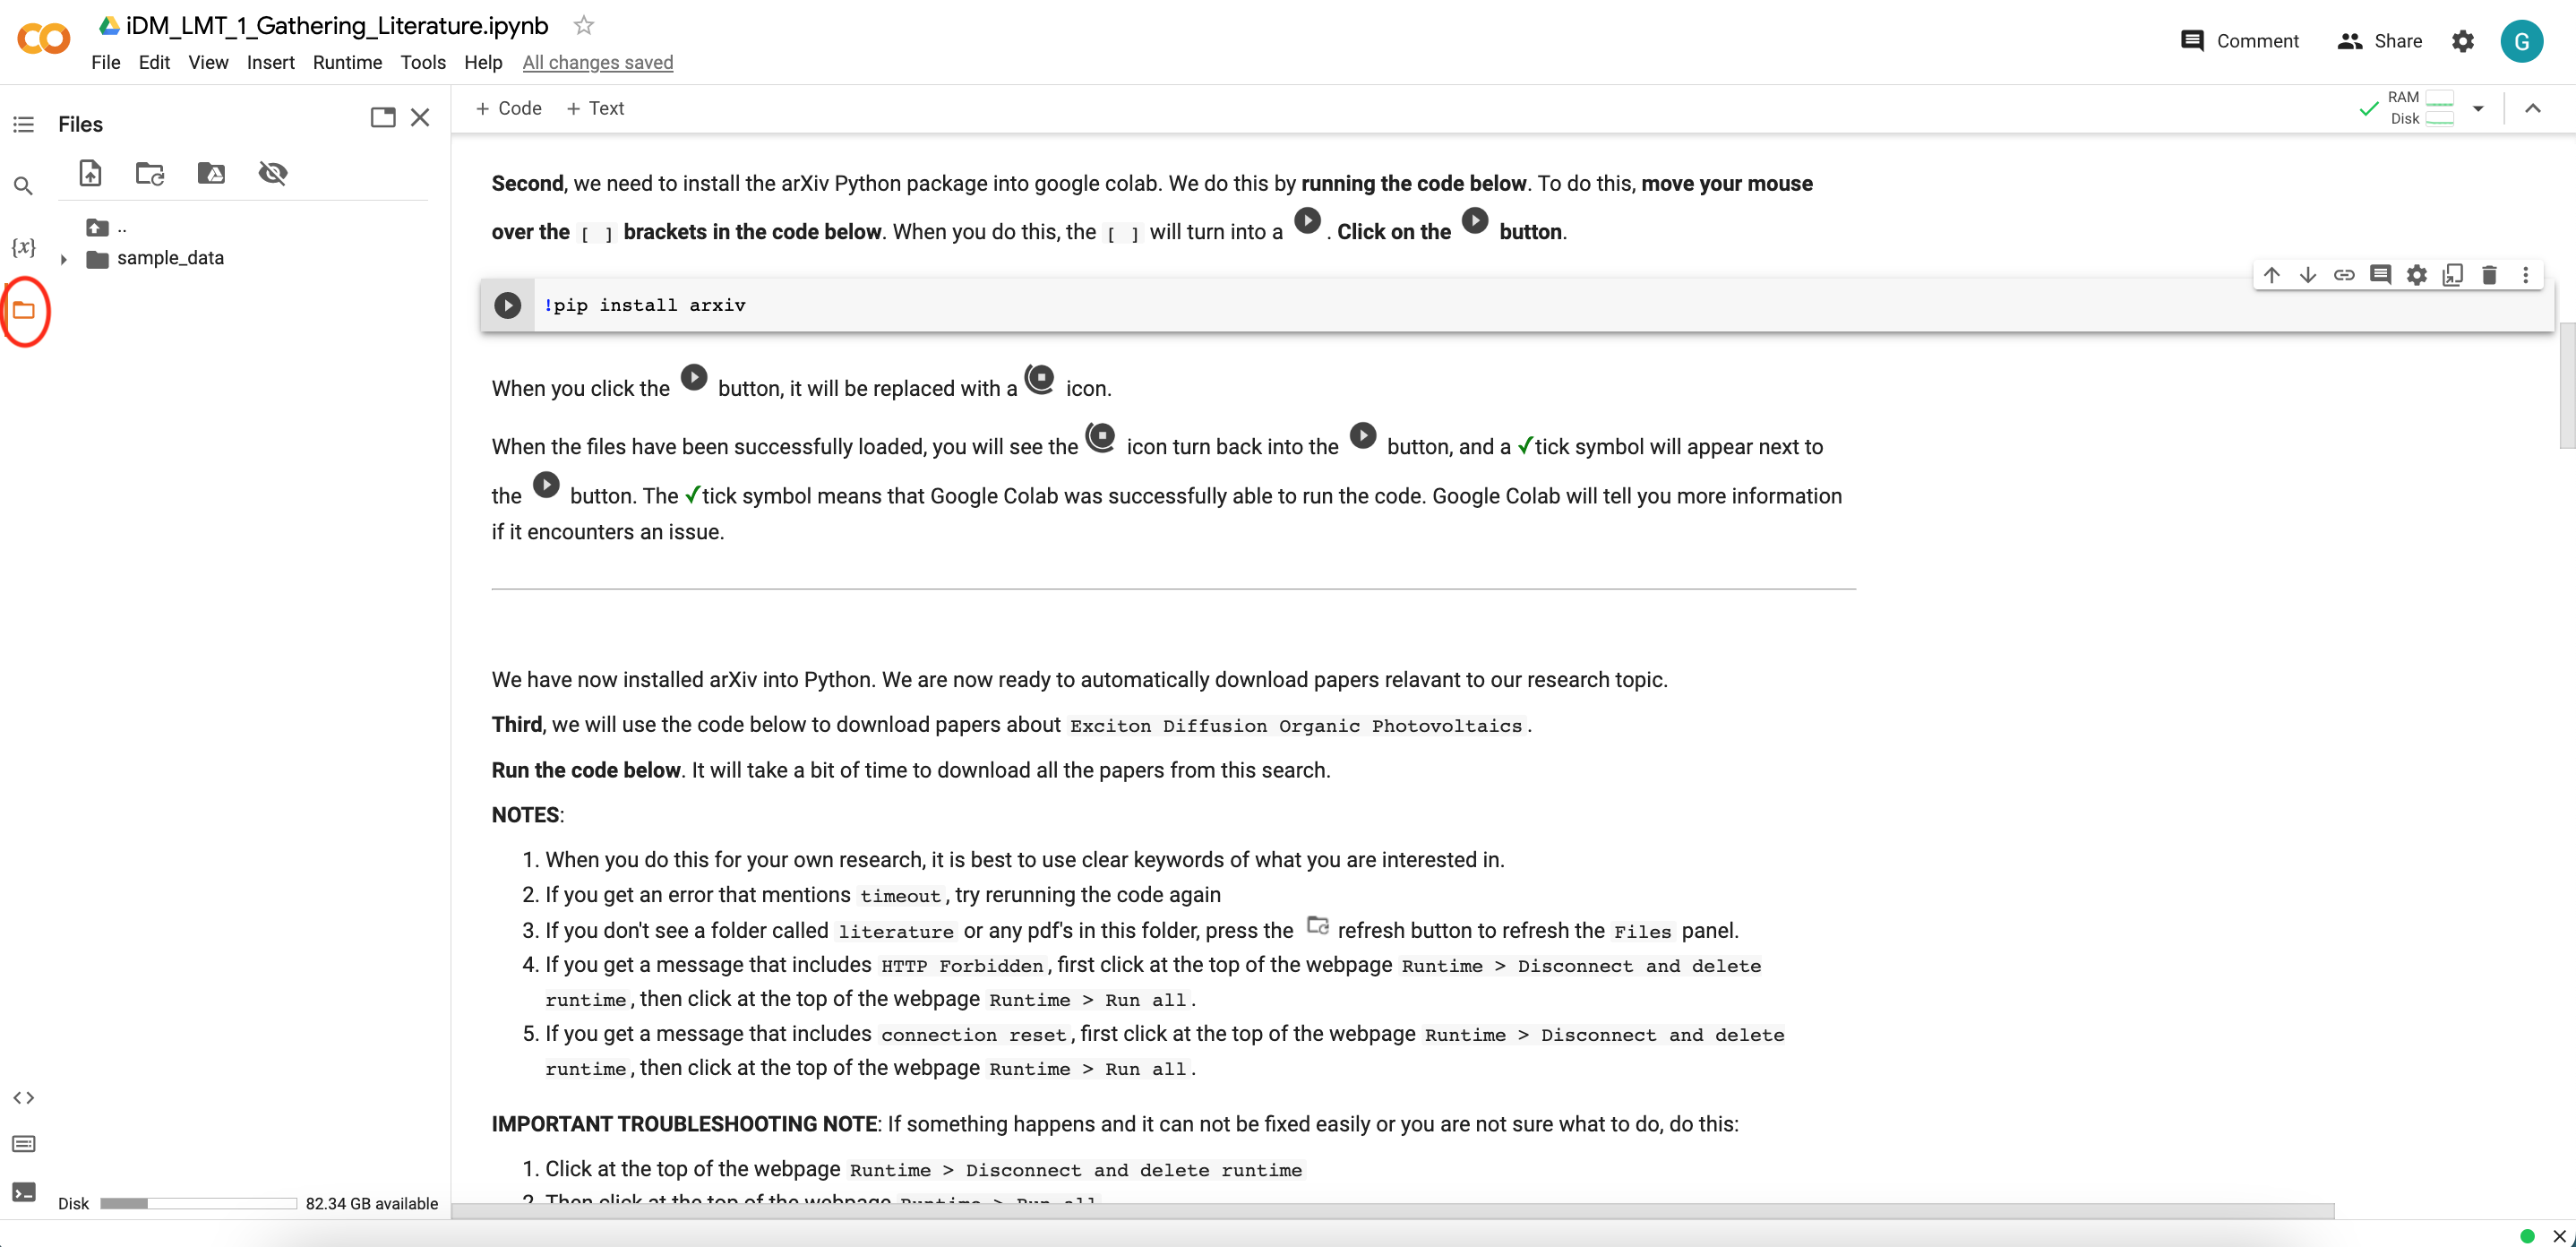

**Second**, we need to install the arXiv Python package into Google Colab. We do this by **running the code below**. To do this, **move your mouse over the** ```[  ]``` **brackets in the code below**. When you do this, the ```[  ]``` will turn into a <img src="https://github.com/GardenGroupUO/Computational_Silver_Nanoparticle_Exercise_Data/blob/main/Images/stop_images/playsvg.png?raw=true" alt="drawing" width="28"/>. **Click on the** <img src="https://github.com/GardenGroupUO/Computational_Silver_Nanoparticle_Exercise_Data/blob/main/Images/stop_images/playsvg.png?raw=true" alt="drawing" width="28"/> **button**.

In [ ]:
!pip install arxiv

When you click the <img src="https://github.com/GardenGroupUO/Computational_Silver_Nanoparticle_Exercise_Data/blob/main/Images/stop_images/playsvg.png?raw=true" alt="drawing" width="28"/> button, it will be replaced with a <img src="https://github.com/GardenGroupUO/Computational_Silver_Nanoparticle_Exercise_Data/blob/main/Images/stop_images/stopsvg.gif?raw=true" alt="drawing" width="28"/> icon.

When the files have been successfully loaded, you will see the <img src="https://github.com/GardenGroupUO/Computational_Silver_Nanoparticle_Exercise_Data/blob/main/Images/stop_images/stopsvg.gif?raw=true" alt="drawing" width="28"/> icon turn back into the <img src="https://github.com/GardenGroupUO/Computational_Silver_Nanoparticle_Exercise_Data/blob/main/Images/stop_images/playsvg.png?raw=true" alt="drawing" width="28"/> button, and a <font color="green" size="4">&check;</font>tick symbol will appear next to the <img src="https://github.com/GardenGroupUO/Computational_Silver_Nanoparticle_Exercise_Data/blob/main/Images/stop_images/playsvg.png?raw=true" alt="drawing" width="28"/> button. The <font color="green" size="4">&check;</font>tick symbol means that Google Colab was successfully able to run the code. Google Colab will tell you more information if it encounters an issue.

--------

We have now installed arXiv into Python. We are now ready to automatically download papers relavant to our research topic. 

**Third**, we will use the code below to download papers about ```Exciton Diffusion Organic Photovoltaics```. 

**Run the code below**. It will take a bit of time to download all the papers from this search. 

**NOTES**:

1.   When you do this for your own research, it is best to use clear keywords of what you are interested in.
2.   If you get an error that mentions ```timeout```, try re-running the code again.
3.   If you don't see a folder called ```literature``` or any pdf's in this folder, press the refresh.png refresh button to refresh the ```Files``` panel.
4.   If you get a message that includes ```HTTP Forbidden```, first click at the top of the webpage ```Runtime > Disconnect and delete runtime```, then click at the top of the webpage ```Runtime > Run all```. 
5.   If you get a message that includes ```connection reset```, first click at the top of the webpage ```Runtime > Disconnect and delete runtime```, then click at the top of the webpage ```Runtime > Run all```. 

**IMPORTANT TROUBLESHOOTING NOTE**: If something happens and it can not be fixed easily and you are not sure what to do, do this:
1.  Click at the top of the webpage ```Runtime > Disconnect and delete runtime```
2.  Then click at the top of the webpage ```Runtime > Run all```. 


In [ ]:
import os, shutil, arxiv, tqdm

# First, set up the search in arXiv
search = arxiv.Search(
  query = "Exciton Diffusion Organic Photovoltaics", # This is where the keywords of the research topic you are interest in go
  max_results = 50, # This will limit the number of papers downloaded to the most relavant. Remove this if you want to download every paper found (including papers not relavant to your research topic).
)

# Second, create folders to save papers to. DO NOT MODIFY
literature_filename = 'literature'
if os.path.exists(literature_filename):
    shutil.rmtree(literature_filename)
os.makedirs(literature_filename)
os.makedirs(literature_filename+'/cond-mat')

# Third, download the papers into a folder called literature. DO NOT MODIFY
pbar = tqdm.tqdm(search.results())
for result in pbar:
    pbar.set_description('Saving '+str(result.title)+': '+str(result.pdf_url))
    result.download_pdf(dirpath=literature_filename)
for file in os.listdir(literature_filename+'/cond-mat'):
    shutil.copyfile(literature_filename+'/cond-mat/'+file, literature_filename+'/'+file)
shutil.rmtree(literature_filename+'/cond-mat')
pbar.set_description('Finished downloading papers from arXiv')
pbar.close()

If you now press the refresh.png refresh button in the ```Files``` Panel, you will see the ```literature``` folder, that contains all your papers in PDF form.

**Fourth**, we now want to download all of these PDFs to our computer. Do to this, we will save our ```literature``` folder into a ```zip``` file, and download this ```zip``` file to our computer. **Run the code below**.

**NOTE**: It may take time to download the ```literature.zip``` file to your computer.

In [ ]:
!zip -r literature.zip literature > .output.txt
from google.colab import files
files.download('literature.zip') 

Once the ```literature.zip``` file has downloaded, you will see this file in your ```downloads``` folder on your computer. Opening this zip file will reveal all the papers you have downloaded as PDFs from the arXiv website. 

----------------------

# 1.2: Gathering Scientific Papers from Scopus

Scopus is a website by Elsevier that allows the user to search the literature for relevant text, and download relavant papers on mass. 

If you would like to try using Scopus to gather papers on mass, check out ```iDM_LMT_1Extra_Gathering_Literature_with_Scopus.ipynb```. Note: For some reason this method does not work as well for Kyoto University users. 

----------------------

**Once you have completed "1.1 Gathering Scientific Papers from arXiv using Python"**, move on to the ```iDM_LMT_2_Extracting.ipynb``` notebook, called ```Extracting Text from PDF using Python```